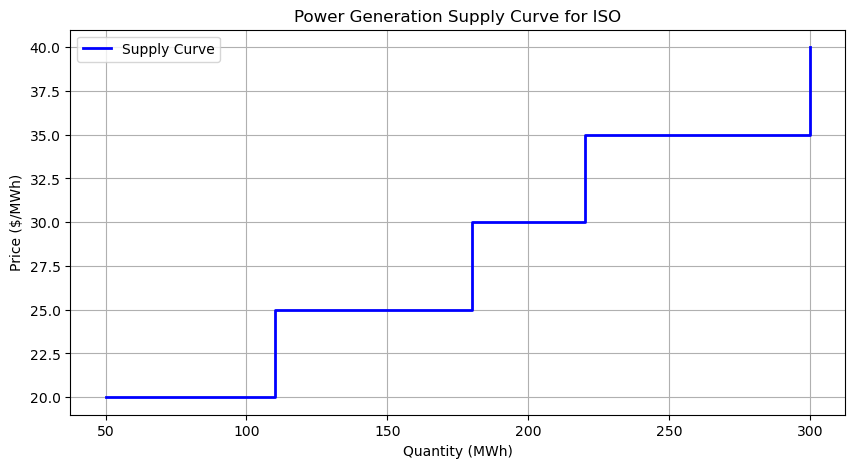

In [6]:
import matplotlib.pyplot as plt

# Example data
bid_prices = [20, 25, 30, 35, 40]
cumulative_quantities = [50, 110, 180, 220, 300]

# Plotting
plt.figure(figsize=(10, 5))
plt.step(cumulative_quantities, bid_prices, where='post', label='Supply Curve', color='b', linewidth=2)
plt.xlabel('Quantity (MWh)')
plt.ylabel('Price ($/MWh)')
plt.title('Power Generation Supply Curve for ISO')
plt.grid(True)
plt.legend()
plt.show()


The system lambda (marginal price) is $30/MWh when market demand is $180/MWh


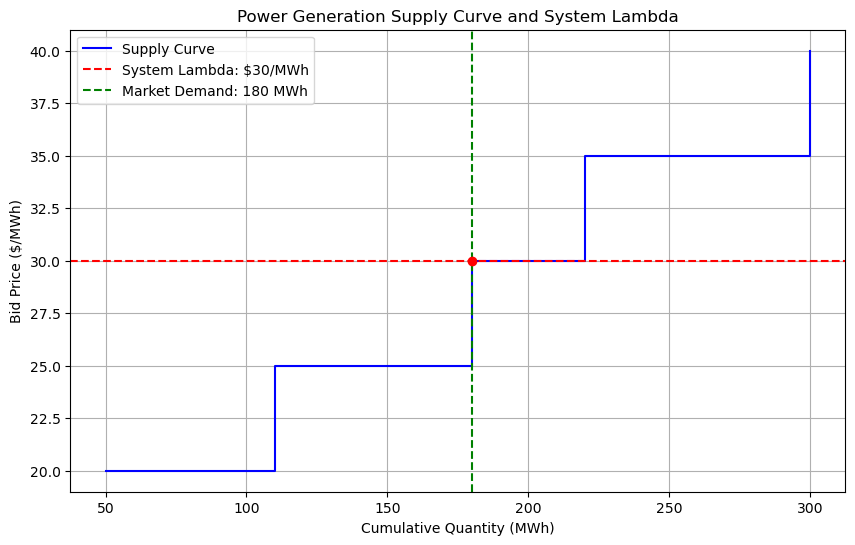

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Example bid data
data = {
    'Generator': ['A', 'B', 'C', 'D', 'E'],
    'Bid Price': [20, 25, 30, 35, 40],
    'Quantity': [50, 60, 70, 40, 80]
}

# Create DataFrame and sort by bid price
df = pd.DataFrame(data)
df = df.sort_values(by='Bid Price')

# Calculate cumulative supply
df['Cumulative Quantity'] = df['Quantity'].cumsum()

# Define market demand
market_demand = 180  # Example demand in MWh

# Find marginal unit
marginal_unit = df[df['Cumulative Quantity'] >= market_demand].iloc[0]
system_lambda = marginal_unit['Bid Price']
marginal_quantity = marginal_unit['Cumulative Quantity']
print(f"The system lambda (marginal price) is ${system_lambda}/MWh when market demand is ${market_demand}/MWh")

# Plotting the supply curve
plt.figure(figsize=(10, 6))
plt.step(df['Cumulative Quantity'], df['Bid Price'], where='post', label='Supply Curve', color='blue')
plt.axhline(y=system_lambda, color='red', linestyle='--', label=f'System Lambda: ${system_lambda}/MWh')
plt.axvline(x=marginal_quantity, color='green', linestyle='--', label=f'Market Demand: {market_demand} MWh')

# Highlight marginal point
plt.plot(marginal_quantity, system_lambda, 'ro')

# Labels and title
plt.xlabel('Cumulative Quantity (MWh)')
plt.ylabel('Bid Price ($/MWh)')
plt.title('Power Generation Supply Curve and System Lambda')
plt.grid(True)
plt.legend()
plt.show()
